> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb_Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzin a data set containing information about 10000+ movies collected from The Movie Database(TMDb).

Upon analysis, we wil try to answer following questions:

1) Which genres are most popular?

2) What kind of properties are associated with highly profitable movies?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [91]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3854 non-null float64
budget                  3854 non-null float64
profit                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(5)
memory usage: 671.9+ KB




### Data Cleaning 

<b> Dropping unnecessary columns</b>

In [4]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
   
df.shape

(10866, 15)

Data type of 'release_date' is object, so changing it into date format.

In [5]:
df.release_date=pd.to_datetime(df['release_date'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Now let's check for duplicates in our data set.

In [8]:
df.duplicated().sum()

1

There's a single duplicate so we'll remove it.

In [9]:
df.drop_duplicates(keep = 'first', inplace = True)

In [10]:
df.shape

(10865, 15)

Now, lets figure out which movies have a value of '0' in their budget or revenue, and then deleting those movies from database.
First we will replace the value of '0' with NaN and then dropping the rows which had NaN values in them.



In [11]:
rows=['budget', 'revenue','budget_adj','revenue_adj']
df[rows] = df[rows].replace(0, np.NaN)
df.dropna(subset=rows, inplace=True)
df.shape

(3854, 15)

In [12]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


As we are now only remaining with 3845 rows from 10k+ rows, these many columns are needed for analysis and we have all valid values for our calculations.

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83aeca71d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f83aeaf0a58>]], dtype=object)

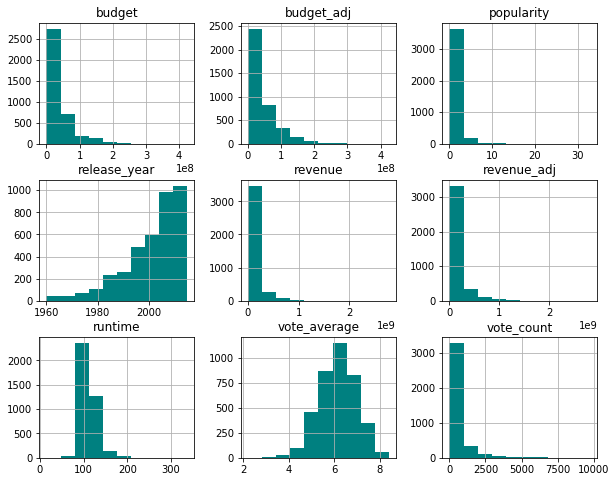

In [14]:
df.hist(figsize=(10,8), color='teal')

From histograms we can nottice that:

1) Histograms labeled “budget”, “revenue”, "popularity", "vote_count" are extremely right-skewed. It means that there's a          gradual decrease in those fields over the years.

2) The histogram of vote_average is normally distributed.

3) The histogram of release_year is left-skewed, which means the movies were released more over the years. There's a gradual      gradual increase in the movie release after the year 1980 and after 2000 it is at the peak.

# Exploratory Data Analysis

Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

In [15]:
df['runtime'] = df['runtime'].replace(0, np.NaN)


Creating a column named Profit to store the profits of the movies earned over the years.

We calculated profit using formula:
 Profit= Revenue - Budget.


In [16]:
df.insert(2, 'profit',df['revenue']-df['budget'])

In [17]:
df['profit'].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit, dtype: float64

# Research Question 1: 
<b>How many movies were released per year?</b>

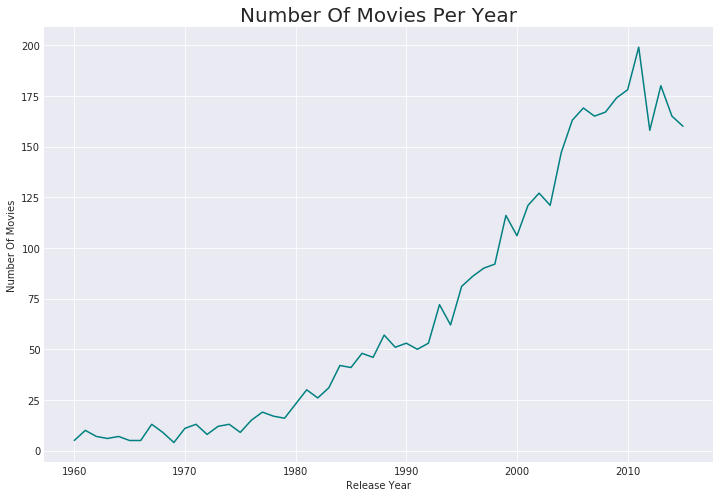

In [64]:
#we know that popularity column has no nulls
#so use it for counting the number of movies
ax = df.groupby('release_year')['popularity'].count().plot(figsize=(12, 8), color='teal')
#set titles and labels
plt.title('Number Of Movies Per Year', size=20)
plt.ylabel('Number Of Movies')
plt.xlabel("Release Year" );

We can see that the number of movie release has significantly increased over the years and it attained its peak value in year 2010.

 *Lets plot a histogram and boxplot to see the runtime distribution of movies over these years.

<b> A) Histogram</b>

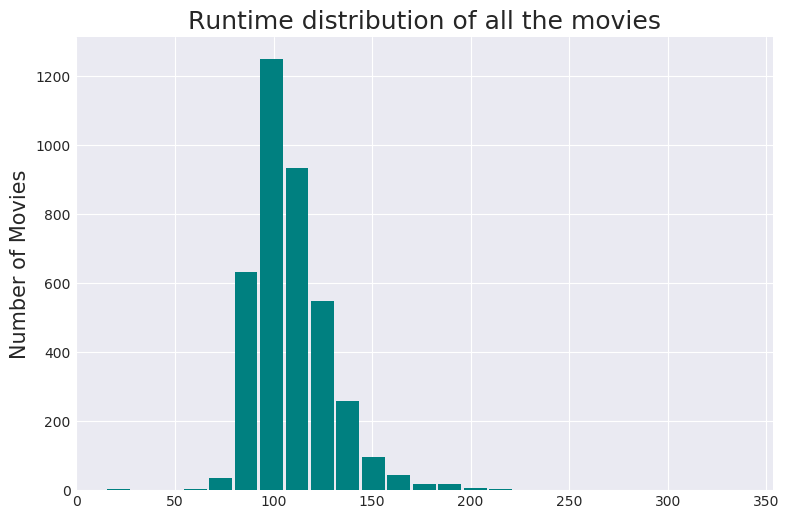

In [56]:
#Plotting Histogram.
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

plt.figure(figsize=(9,6), dpi = 100)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins=25, color='teal')
#displays the plot
plt.show()

<b> B) Boxplot </b>

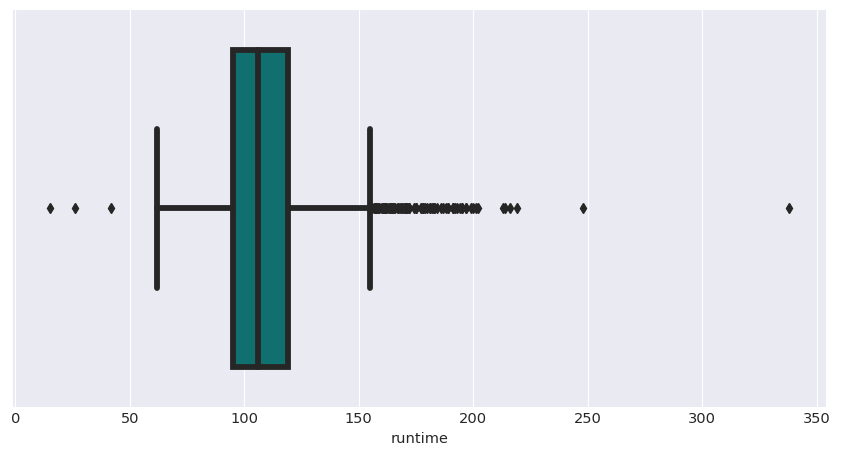

In [82]:
plt.figure(figsize=(10,5), dpi = 105)
sns.set_style('darkgrid')
#plotting box plot
sns.boxplot(df['runtime'], linewidth = 4, color='teal')
#showing the plot
plt.show()

<h3> In which year we had most movies making profit?</h3>

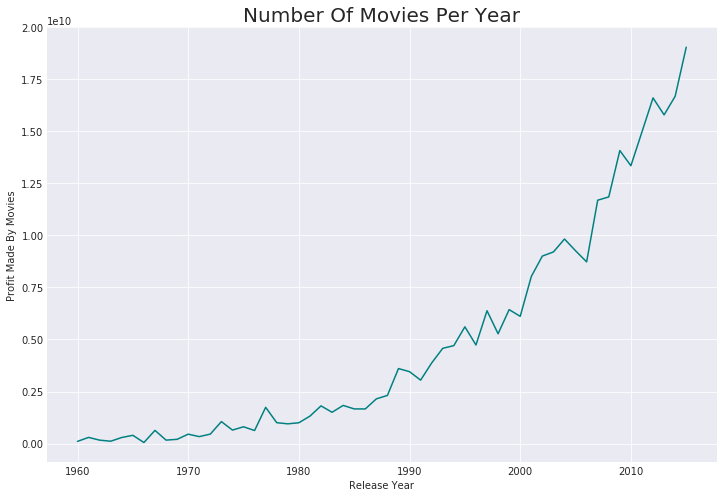

In [77]:
#we know that popularity column has no nulls
#so use it for counting the number of movies
ax = df.groupby('release_year')['profit'].sum().plot(figsize=(12, 8), color='teal')
#set titles and labels
plt.title('Number Of Movies Per Year', size=20)
plt.ylabel('Profit Made By Movies')
plt.xlabel("Release Year" );

From the plot we can see that most of the movies which were released after 2000 made greater profit than those released prior to year 2000

<b> Popularity Vs Vote_Count regression plot depicting the vote counts and popularity of the movies.</b>

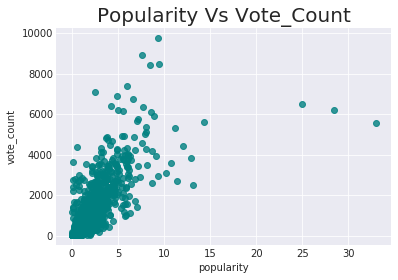

In [86]:
x=sns.regplot(data=df, x='popularity' ,y='vote_count', fit_reg=False, color='teal').set_title('Popularity Vs Vote_Count', size=20)


<h2> Research Question 2  :
    What kind of properties are associated with highly profitable movies?</h2>

Befor answering to this question, we need to create a dataset of movies who made profit of 100M. As these movies have grossed such a humungous amount, we will analyse the common trends between them.

In [31]:
profit_data = df.query('profit >= 100000000')   

#reindexing new dataframe
profit_data.index = range(len(profit_data))
#will initialize dataframe from 1 instead of 0
profit_data.index = profit_data.index + 1

#showing the dataset
profit_data.head(2)

,popularity,budget,profit,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,28.419936,150000000.0,2.284364e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
profit_data.shape

(826, 16)

In 100M club, we only have 826 movies, whereas we have a total of 3854 enteries in our dataset.

In [33]:
#A common fucntion created to reduce the work of writing the code repeatedly. 
#The function will take any column as argument from which data is to be extracted and keep the track of its count.

def extract(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

 <h4>Q) Which actors were appeared the most?</h4>

In [34]:
c=extract('cast')
c.head(2)

Tom Cruise    23
Tom Hanks     19
dtype: int64

The list of artists which has appeared the most in our 100M club.
Tom Cruise has the most number of appearence in the most profitable movies.

<h4> Q) Which are the successful genres in profiatble movies?</h4>

In [35]:
a=extract('genres')
a.head()

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

Visualizing the plot for most successful genres.

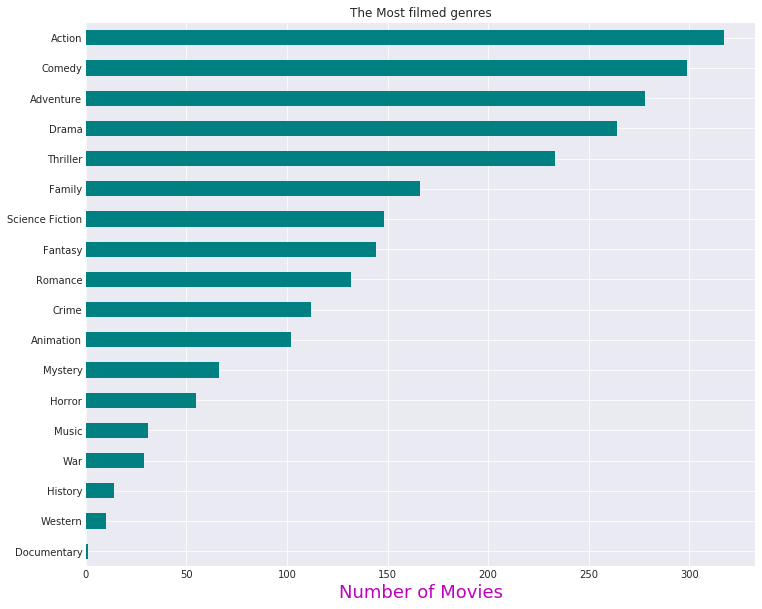

In [36]:
a.sort_values(ascending =True, inplace=True)
ax = a.plot.barh(color='teal')
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'm', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

#<h4> Q) Directors which directed most number of profitable movies:</h4>


In [37]:
dirx = extract('director')
dirx.head()

Steven Spielberg    22
Robert Zemeckis     10
Michael Bay          8
Ridley Scott         7
David Fincher        7
dtype: int64

<h4> Q) Top 10 production companies which produced most number of profitable movies:</h4>

In [38]:
pc=extract('production_companies').head(10)
pc

Warner Bros.                              102
Universal Pictures                         99
Paramount Pictures                         87
Twentieth Century Fox Film Corporation     82
Walt Disney Pictures                       58
Columbia Pictures                          54
New Line Cinema                            39
Amblin Entertainment                       34
Touchstone Pictures                        32
Relativity Media                           31
dtype: int64

 <h3>Visualization for top 10 production companies:</h3>

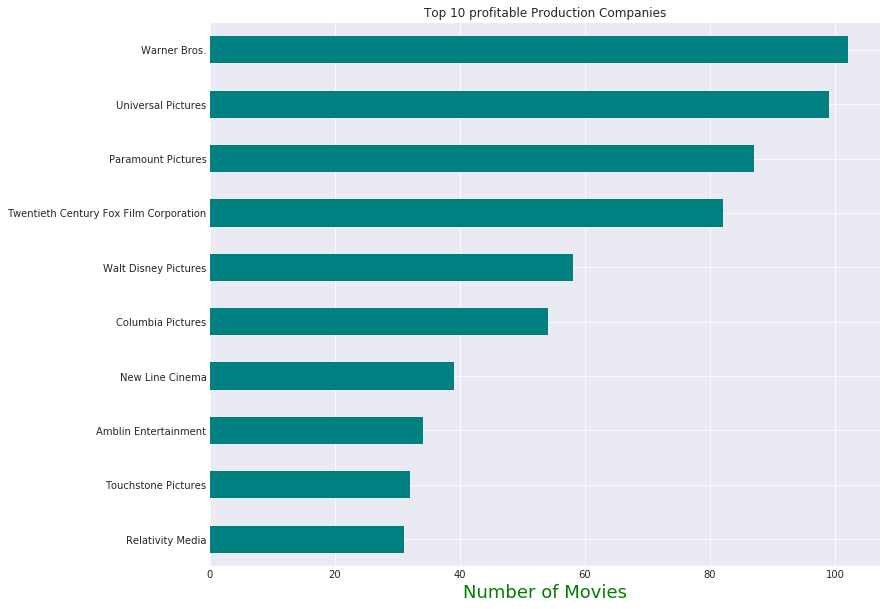

In [39]:
pc.sort_values(ascending =True, inplace=True)
ax = pc.plot.barh(color='teal')
ax.set(title = 'Top 10 profitable Production Companies')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Average budget of movie:

In [40]:
profit_data['budget'].mean()

74469572.77602905

Average revenue of movie:

In [41]:
profit_data['revenue'].mean()

345328046.81961256

Average profits earned by the movie in 100M club:

In [42]:
profit_data['profit'].mean()

270858474.04358351

Average Runtime:


In [43]:
profit_data['runtime'].mean()

115.62832929782083

<a id='conclusions'></a>
## Conclusions

Finally, to sum it all up, we can go throuhg few of our findings from above analysis:

1. Steven Spielberg and Robert Zemeckis are among the top directors.
2. 'Warner Bros' and 'Universal Pictures' are the most profitable production companies.
3. Tom Cruise, Tom Hanks and Brad Pitt are among the top actors to featured in most profitable movies.
4. Action & Comedy are the most filmed genre.
5. The least popular genres were "Documentary" and "Foreign".

<b>Limitations</b>

- There was a lot of missing data in the dataset.
- In the dataset, some of the fields were '0' and I can't conclude exact results based on that data, so I dropped those field.   I feel that the results are not totally reliable as we calculated it with some voids present in our dataset, but it can give   us fairly rough idea about how the trends would look like.



In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0